In [310]:
import pandas as pd
import numpy as np

In [311]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline
from scipy.stats import norm

In [312]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [313]:
df = pd.read_csv('../Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdSVX.csv')

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         30 non-null     object
 1   START_DATE  30 non-null     object
 2   OIL         30 non-null     int64 
 3   GAS         30 non-null     int64 
 4   WATER       30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [315]:
df.isnull().sum()

UWI           0
START_DATE    0
OIL           0
GAS           0
WATER         0
dtype: int64

In [316]:
df.head()

,UWI,START_DATE,OIL,GAS,WATER
0,TR662,2016-01-01,12180,5982,0
1,AB119,2016-02-01,0,0,0
2,TF445,2016-03-01,0,0,0
3,DS546,2016-04-01,46274,33831,372
4,TF454,2016-05-01,42851,35070,3


In [317]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,TR662,2016-01-01,12180,5982,0
1,AB119,2016-02-01,0,0,0
2,TF445,2016-03-01,0,0,0
3,DS546,2016-04-01,46274,33831,372
4,TF454,2016-05-01,42851,35070,3
5,DS378,2016-06-01,48501,39039,0
6,CC310,2016-07-01,26205,17664,8192
7,TF740,2016-08-01,50565,41525,0
8,CC872,2016-09-01,26640,12833,0
9,AB517,2016-10-01,20991,12560,414


In [318]:
df.corr()['OIL'].sort_values()

WATER    0.162490
GAS      0.933002
OIL      1.000000
Name: OIL, dtype: float64

In [319]:
df.corr()['GAS'].sort_values()

WATER    0.298243
OIL      0.933002
GAS      1.000000
Name: GAS, dtype: float64

In [320]:
df.corr()['WATER'].sort_values()

OIL      0.162490
GAS      0.298243
WATER    1.000000
Name: WATER, dtype: float64

In [321]:
df.corr()

,OIL,GAS,WATER
OIL,1.000000,0.933002,0.162490
GAS,0.933002,1.000000,0.298243
WATER,0.162490,0.298243,1.000000


In [322]:
from datetime import datetime
import statsmodels.api as sm

In [323]:
#df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [324]:
#df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [325]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,TR662,2016-01-01,12180,5982,0
1,AB119,2016-02-01,0,0,0
2,TF445,2016-03-01,0,0,0
3,DS546,2016-04-01,46274,33831,372
4,TF454,2016-05-01,42851,35070,3
5,DS378,2016-06-01,48501,39039,0
6,CC310,2016-07-01,26205,17664,8192
7,TF740,2016-08-01,50565,41525,0
8,CC872,2016-09-01,26640,12833,0
9,AB517,2016-10-01,20991,12560,414


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         30 non-null     object
 1   START_DATE  30 non-null     object
 2   OIL         30 non-null     int64 
 3   GAS         30 non-null     int64 
 4   WATER       30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [327]:
df.set_index('START_DATE',inplace=True)

In [328]:
df

,UWI,OIL,GAS,WATER
START_DATE,,,,
2016-01-01,TR662,12180,5982,0
2016-02-01,AB119,0,0,0
2016-03-01,TF445,0,0,0
2016-04-01,DS546,46274,33831,372
2016-05-01,TF454,42851,35070,3
2016-06-01,DS378,48501,39039,0
2016-07-01,CC310,26205,17664,8192
2016-08-01,TF740,50565,41525,0
2016-09-01,CC872,26640,12833,0


In [329]:
df['OIL']

START_DATE
2016-01-01    12180
2016-02-01        0
2016-03-01        0
2016-04-01    46274
2016-05-01    42851
2016-06-01    48501
2016-07-01    26205
2016-08-01    50565
2016-09-01    26640
2016-10-01    20991
2016-11-01    22536
2016-12-01        0
2017-01-01    69606
2017-02-01    31157
2017-03-01     8688
2017-04-01    33193
2017-05-01    30336
2017-06-01    36285
2017-07-01    34771
2017-08-01    55485
2017-09-01    36548
2017-10-01    13665
2017-11-01        0
2017-12-01    17892
2018-01-01    39340
2018-02-01    38902
2018-03-01    53720
2018-04-01    29862
2018-05-01    18820
2018-06-01    42314
Name: OIL, dtype: int64

In [330]:
df = df.drop('WATER',axis=1)

In [331]:
df = df.drop('UWI',axis=1)

In [332]:
df = df.drop('GAS',axis=1)

In [333]:
df

,OIL
START_DATE,
2016-01-01,12180
2016-02-01,0
2016-03-01,0
2016-04-01,46274
2016-05-01,42851
2016-06-01,48501
2016-07-01,26205
2016-08-01,50565
2016-09-01,26640


In [334]:
df['OIL']

START_DATE
2016-01-01    12180
2016-02-01        0
2016-03-01        0
2016-04-01    46274
2016-05-01    42851
2016-06-01    48501
2016-07-01    26205
2016-08-01    50565
2016-09-01    26640
2016-10-01    20991
2016-11-01    22536
2016-12-01        0
2017-01-01    69606
2017-02-01    31157
2017-03-01     8688
2017-04-01    33193
2017-05-01    30336
2017-06-01    36285
2017-07-01    34771
2017-08-01    55485
2017-09-01    36548
2017-10-01    13665
2017-11-01        0
2017-12-01    17892
2018-01-01    39340
2018-02-01    38902
2018-03-01    53720
2018-04-01    29862
2018-05-01    18820
2018-06-01    42314
Name: OIL, dtype: int64

In [335]:
from scipy import stats

In [336]:
df=df.replace(0, np.nan)

In [337]:
df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 2016-01-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OIL     26 non-null     float64
dtypes: float64(1)
memory usage: 416.0+ bytes


In [339]:
df['OIL']

START_DATE
2016-01-01    12180.0
2016-04-01    46274.0
2016-05-01    42851.0
2016-06-01    48501.0
2016-07-01    26205.0
2016-08-01    50565.0
2016-09-01    26640.0
2016-10-01    20991.0
2016-11-01    22536.0
2017-01-01    69606.0
2017-02-01    31157.0
2017-03-01     8688.0
2017-04-01    33193.0
2017-05-01    30336.0
2017-06-01    36285.0
2017-07-01    34771.0
2017-08-01    55485.0
2017-09-01    36548.0
2017-10-01    13665.0
2017-12-01    17892.0
2018-01-01    39340.0
2018-02-01    38902.0
2018-03-01    53720.0
2018-04-01    29862.0
2018-05-01    18820.0
2018-06-01    42314.0
Name: OIL, dtype: float64

In [340]:
#OilRate=df['OIL']
#OilRate

In [341]:
#df[['START_DATE','UWI','OIL']].sort_values('OIL',ascending = True).groupby(by='UWI').sum().tail(20)
#dfx=df[['UWI','OIL']].sort_values('OIL',ascending = True).groupby(by='OIL').sum().tail(20)
#dfx

In [342]:
#df
#dfy=df[['START_DATE','OIL']].sort_values('OIL',ascending = True).groupby(by='OIL').sum().tail(20)
#dfy

In [343]:
df.isnull().sum()

OIL    0
dtype: int64

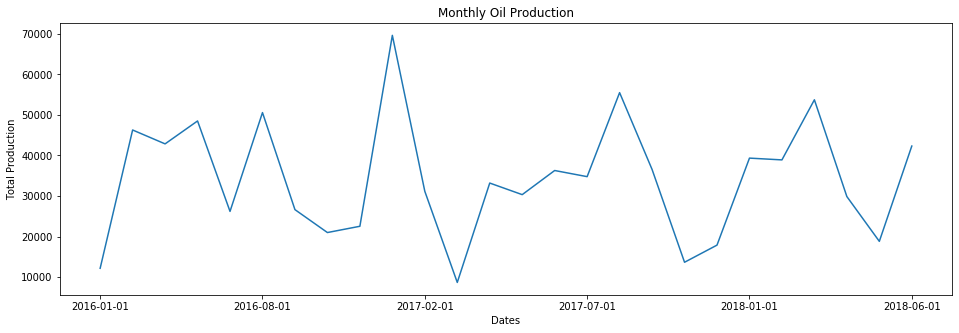

In [344]:
df.index.freq = 'MS'
ax = df['OIL'].plot(figsize = (16,5), title = "Monthly Oil Production")
ax.set(xlabel='Dates', ylabel='Total Production');

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

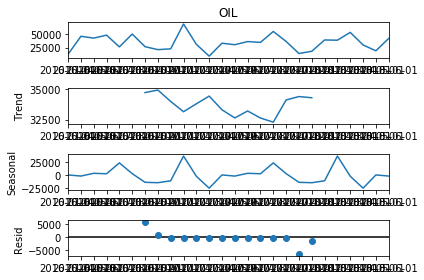

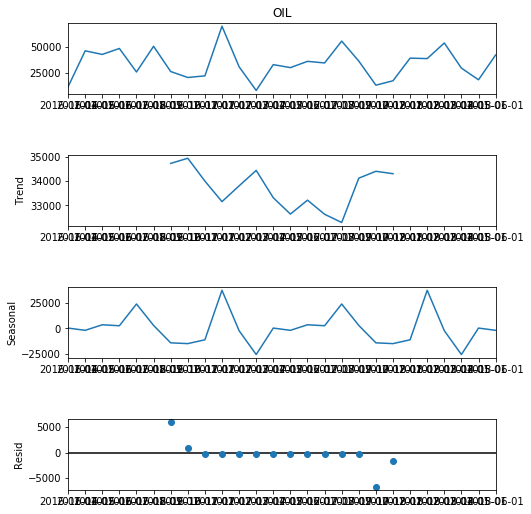

In [345]:
a=seasonal_decompose(df['OIL'],period=12)
a.plot()
a.plot().set_size_inches(8,8)

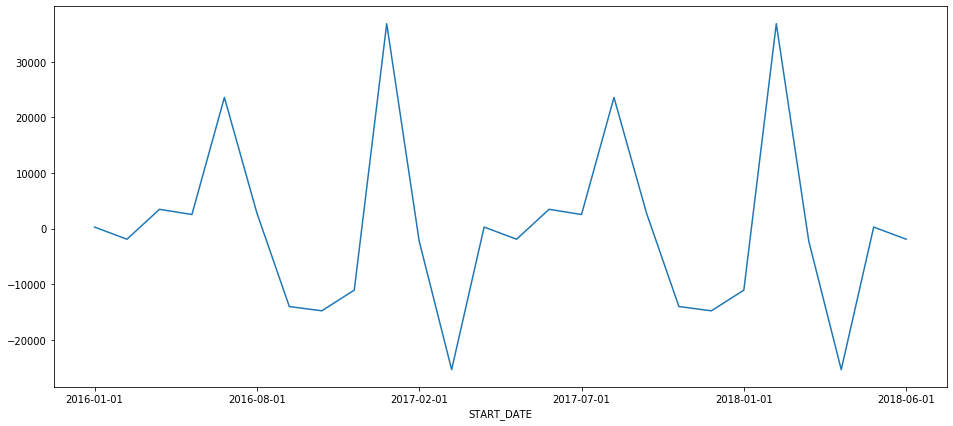

In [346]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [347]:
auto_arima(df['OIL'],seasonal=True,m=12,max_p=7,max_d=5,max_q=7,max_P=4,max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   26
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 12)   Log Likelihood                -281.521
Date:                             Tue, 05 Jan 2021   AIC                            573.043
Time:                                     03:25:57   BIC                            579.333
Sample:                                          0   HQIC                           574.854
                                              - 26                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.356e+04    2.5e+04      1.342      0.179   -1.54e+04    8.26e+04
ma.L1         -0.4788      0.505     -0.949      0.343      -1.468       0.511
ma.L2         -0.4712      0.823     -0.572      0.567      -2.085       1.142
ar.S.L12       0.0130      0.725      0.018      0.986      -1.408       1.434
sigma2      1.734e+08      0.436   3.98e+08      0.000    1.73e+08    1.73e+08
===================================================================================
Ljung-Box (Q):                       22.36   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.61   Prob(JB):                         0.39
Heteroskedasticity (H):               0.57   Skew:                             0.65
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+25. Standard errors may be unstable.
"""

In [348]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [349]:
arima_model = SARIMAX(train_data['OIL'], order = (0,0,2), seasonal_order = (1,0,0,12))
arima_result = arima_model.fit()
arima_result.summary()

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 OIL   No. Observations:                   14
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 12)   Log Likelihood                -163.523
Date:                             Tue, 05 Jan 2021   AIC                            335.046
Time:                                     03:26:50   BIC                            337.602
Sample:                                          0   HQIC                           334.810
                                              - 14                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7654      0.992      0.771      0.441      -1.180       2.711
ma.L2          0.3778      0.661      0.571      0.568      -0.918       1.674
ar.S.L12       0.0525      4.135      0.013      0.990      -8.052       8.157
sigma2      1.318e+09   9.38e-09    1.4e+17      0.000    1.32e+09    1.32e+09
===================================================================================
Ljung-Box (Q):                       12.18   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.51   Prob(JB):                         0.67
Heteroskedasticity (H):               1.96   Skew:                             0.35
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.77e+33. Standard errors may be unstable.
"""

In [350]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


14    15523.108759
15     2013.889742
16     1375.897755
17     2654.923487
18     1398.737500
19     1102.135843
20     1183.256318
21     3654.674265
22     1635.903314
23      456.164842
24     1742.803823
25     1592.796577
Name: ARIMA Predictions, dtype: float64

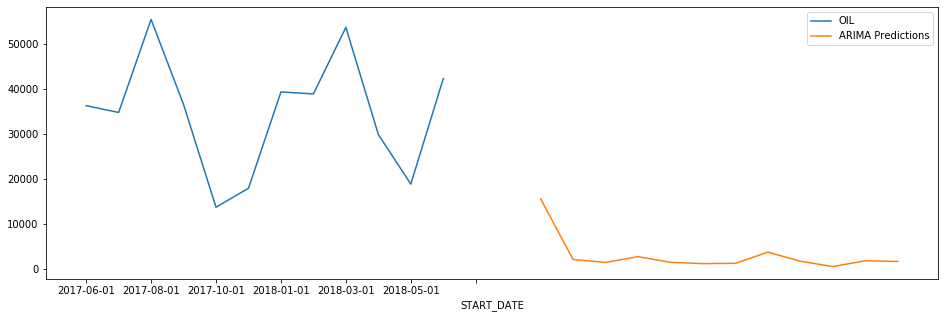

In [351]:
test_data['OIL'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [352]:
arima_rmse_error = rmse(test_data['OIL'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['OIL'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 1186549590.1755157
RMSE Error: 34446.32912482135
Mean: 34127.96153846154


In [353]:
test_data['ARIMA_Predictions'] = arima_pred

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
